**Team Members:**

Ananya Krithika Thyagarajan (23187123)

Karthik Krishnamoorthy (23037687)





**THIS CODE EXECUTES TO THE END WITHOUT ANY ERROR**

In [ ]:
import gym
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

print(gym.__version__)

import sys
assert sys.version_info >= (3, 10)

IS_REMOTE_ENV = "google.colab" in sys.modules
IS_COMPETITION_ENV = "kaggle_secrets" in sys.modules

if IS_REMOTE_ENV or IS_COMPETITION_ENV:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    %pip install -q -U tf-agents pyvirtualdisplay gym[box2d] atari_py==0.2.6

# Checks for specific versions of machine learning frameworks
import sklearn
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.15"

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.config.experimental.list_physical_devices('GPU'):
    print("TensorFlow will run on GPU.")
else:
    print("TensorFlow will run on CPU.")

# Verification of GPU presence
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_REMOTE_ENV:
        print("Go to Runtime > Change runtime type and select a GPU hardware accelerator.")
    if IS_COMPETITION_ENV:
        print("Go to Settings > Accelerator and select GPU.")


0.26.2


2024-04-26 18:16:25.115830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 18:16:25.115870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 18:16:25.116483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 18:16:25.120256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1
TensorFlow will run on GPU.


2024-04-26 18:16:26.428048: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.431511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.431557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [ ]:
def write_to_log(entry, logfile="execution_log.txt"):
    # Appends a new entry to the log file
    with open(logfile, "a") as log:
        log.write(entry + "\n")


In [ ]:
# Function to store frame sequence as a video file
def archive_video(sequence, filepath='video_record.mp4', frame_rate=30):
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    fig, ax = plt.subplots()
    ax.set_axis_off()
    frame_images = [[plt.imshow(frame, animated=True)] for frame in sequence]
    animation_obj = animation.ArtistAnimation(fig, frame_images, interval=50, blit=True, repeat_delay=1000)
    animation_obj.save(filepath, writer='ffmpeg', fps=frame_rate)
    plt.close(fig)

def archive_figure(fig_label, ensure_tight_layout=True, file_extension="png", dpi_resolution=300):
    save_path = os.path.join(IMAGES_PATH, fig_label + "." + file_extension)
    print("Storing figure", fig_label)
    if ensure_tight_layout:
        plt.tight_layout()
    plt.savefig(save_path, format=file_extension, dpi=dpi_resolution)

# Environment setup

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


pyvirtualdisplay not available, skipping setup.


/home/draoi/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


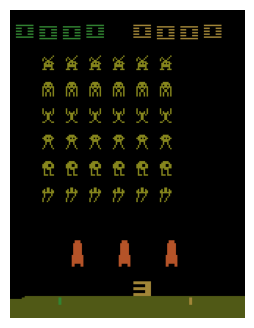

In [ ]:
import gym
simulation_env = gym.make("SpaceInvaders-v4", render_mode="rgb_array")
input_dimensions = simulation_env.observation_space.shape
action_count = simulation_env.action_space.n

# Establish virtual display for GUI-required environments
try:
    from pyvirtualdisplay import Display
    virtual_display = Display(visible=0, size=(1400, 900)).start()
except ImportError:
    print("pyvirtualdisplay is not installed, bypassing display setup.")

import matplotlib.pyplot as plt

def visualize_simulation(environment, plot_size=(5,4)):
    plt.figure(figsize=plot_size)
    observation = environment.reset(seed=42)
    captured_image = environment.render()
    plt.imshow(captured_image)
    plt.axis("off")
    return captured_image

visualize_simulation(simulation_env)
plt.show()

# DQN implementation

In [ ]:
# Reset session for fresh model training
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Constructing the Deep Q-Network model
# Enhanced DQN architecture employing convolutional layers to better interpret
# the complex image-based state representation of the Space Invaders environment
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(8, 8), strides=(4, 4), activation="relu", input_shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
    #Flatten to convert 2D feature maps to 1D feature vectors
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="elu"),
    keras.layers.Dense(n_outputs)
])

2024-04-26 18:16:26.778611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.778692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.778722: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.926125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 18:16:26.926181: I external/local_xla/xla/stream_executor

In [ ]:
def epsilon_policy(state, exploration_factor):
    # Decides on an action using epsilon-greedy approach
    # Balancing exploration and exploitation
    if np.random.rand() < exploration_factor:
        return np.random.randint(action_count)
    else:
        # Ensures input state is in array form for model prediction
        if isinstance(state, tuple):
            state = state[0]
        # Computes Q-values for the current state using the DQN
        predicted_q_values = deep_q_network.predict(state[np.newaxis], verbose=0)
        # Chooses the action with the highest Q-value
        return np.argmax(predicted_q_values[0])

from collections import deque
# Enlarge the replay buffer size due to a broader state space in this environment
experience_replay_buffer = deque(maxlen=8000)

In [ ]:
def sample_interactions(batch_size):
    # Randomly selects a batch of interactions from the experience replay buffer
    indices = np.random.randint(len(experience_replay_buffer), size=batch_size)
    batch = [experience_replay_buffer[index] for index in indices]
    #Decomposes the batch into separate arrays for each component of an experience
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

In [ ]:
def adjusted_reward(reward, info, prev_lives, curr_lives, done):
    # Modifies the reward based on life loss to promote longevity
    if curr_lives < prev_lives:
        # Apply a negative reward for losing a life
        reward -= 200

    episode_frame_count = info['episode_frame_number']
    # Incremental reward for survival per frame
    reward += 0.1 #episode_frame_count * 0.1

    return reward

In [ ]:
def play_one__step(env, state, epsilon, prev_lives):
    # Decides the next action using epsilon-greedy policy based on the current state and exploration rate
    action = epsilon_policy(state, epsilon)

    # Executes the selected action in the environment, which returns various outcomes

    next_state, reward, terminated, truncated, game_info = simulation_env.step(action)

    curr_lives = game_info.get('lives', prev_lives)  # Get current lives from game info
    done = terminated

    # Reward modification based on game dynamics and agent's performance
    reward = adjusted_reward(reward, game_info, prev_lives, curr_lives, done)

    # Ensures that state inputs are arrays (for environments that might return tuples)
    if isinstance(state, tuple):
        state = state[0]
    if isinstance(next_state, tuple):
        next_state = next_state[0]

    # Stores the interaction in the experience replay buffer
    experience_replay_buffer.append((state, action, reward, next_state, done))

    return next_state, reward, done, game_info, curr_lives

# DQN Training

In [ ]:
batch_size = 32
discount_factor = 0.99
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
#M Huber loss for improved stability with outliers
loss_func = keras.losses.Huber()

# Function to perform a training step for the DQN agent
def train_step(batch_size):
    # Retrieve a batch of interactions from the experience replay buffer
    experiences = sample_interactions(batch_size)
    #Decompose the batch into separate arrays for each component
    states, actions, rewards, next_states, dones = experiences

    # Predict Q-values for the next states using the deep Q-network

    next_q_values = model.predict(next_states, verbose=0)

    # Determine the maximum Q-value among next actions for each next state
    max_next_q_values = np.max(next_q_values, axis=1)

    # Compute the target Q-values using the Bellman equation
    target_q_values = (rewards +
        (1 - dones) * discount_factor * max_next_q_values)

    #Reshape for compatibility with the expected Q-values array shape by the loss function
    target_q_values = target_q_values.reshape(-1, 1)

    #Mask to isolate Qvalue corresponding to the action that was taken
    #Create a mask to extract the Q-values for the taken actions using one-hot encoding
    mask = tf.one_hot(actions, n_outputs)

    #GUse a gradient tape for automatic differentiation
    with tf.GradientTape() as tape:
        #Predict Qvalues for all actions given the current states
        all_Qqvalues = model(states)

        #Calculate Qvalues of the performed actions by applying a mask to the predicted Qvalues
        q_values = tf.reduce_sum(all_q_values * mask, axis=1, keepdims=True)

        #Loss between the target Qvalues and Qvalues of taken actions
        #We're using Huber loss as it is less sensitive to outliers comapred to squared error loss
        # Calculate loss between the target and computed Q-values using Huber loss
        loss = tf.reduce_mean(loss_fn(target_q_values, q_values))

    # Compute gradients of the loss w.r.t the network's parameters
    gradient = tape.gradient(loss, model.trainable_variables)

    #Apply gradients to update the network's parameters
    optimizer.apply_gradients(zip(gradient, model.trainable_variables))

In [ ]:
from matplotlib import animation
#Variables for tracking best performance and rewards
best_score = -np.inf
rewards = []
epsilons = []
best_weights = None
num_episodes = 500

#Dictionary to store weights
saved_weights = {}

 write_to_log("DQN: Starting training...")
#Looping through fixed number of episodes to train the DQN
for episode in range(num_episodes):
    #Reset the environment for a new episode
    obs = simulation_env.reset()
    episode_reward = 0
    frames = []

    curr_lives = simulation_env.unwrapped.ale.lives()

    #Loop over a max of 50000 steps per episode, Allows for the agent to continue
    for step in range(50000):
        #Compute the epsilon value for epsilon-greedy policy, decaying over time to reduce exploration
        epsilon = max(1 - episode / num_episodes, 0.1)
        frames.append(simulation_env.render())
        #Execute one step in environment
        obs, reward, done, info, curr_lives = play_one__step(simulation_env, obs, epsilon, curr_lives)
        #Calculate the accumulated reward
        episode_reward += reward
        if done:
            break

    #Add total reward from episode to a list for tracking
    rewards.append(episode_reward)
    #Store the epsilon value used
    epsilons.append(epsilon)

    #Check if episode reward is highest so far
    if episode_reward > best_score:
        #Update best score
        best_score = episode_reward
        #Save model weights that achieved the best score
        best_weights = model.get_weights()
        #Save the video of the best-scoring episode
        archive_video(frames, f'DQN_training_videos/episode_{episode}_best_score_{episode_reward:.3f}.mp4')
        #Save the model weights for this episode
        saved_weights[episode] = model.get_weights()

    #Perform training step using batch from memory, f replay memory is filled, p
    if len(experience_replay_buffer) > batch_size:
        train_step(batch_size)

    #Logs
    episode_details = f"\rEpisode: {episode}, Reward: {episode_reward}, Best score: {best_score}, Epsilon: {epsilon:.3f}"
    write_to_log(episode_details)
    print(episode_details, end="")

if best_weights:
    model.set_weights(best_weights)

2024-04-26 18:16:48.355552: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-26 18:16:50.017988: I external/local_xla/xla/service/service.cc:168] XLA service 0x5638e16e0520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-26 18:16:50.018023: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2024-04-26 18:16:50.021815: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714151810.100405    6039 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Episode: 499, Reward: -159.90000000000248, Best score: 233.39999999999972, Epsilon: 0.100

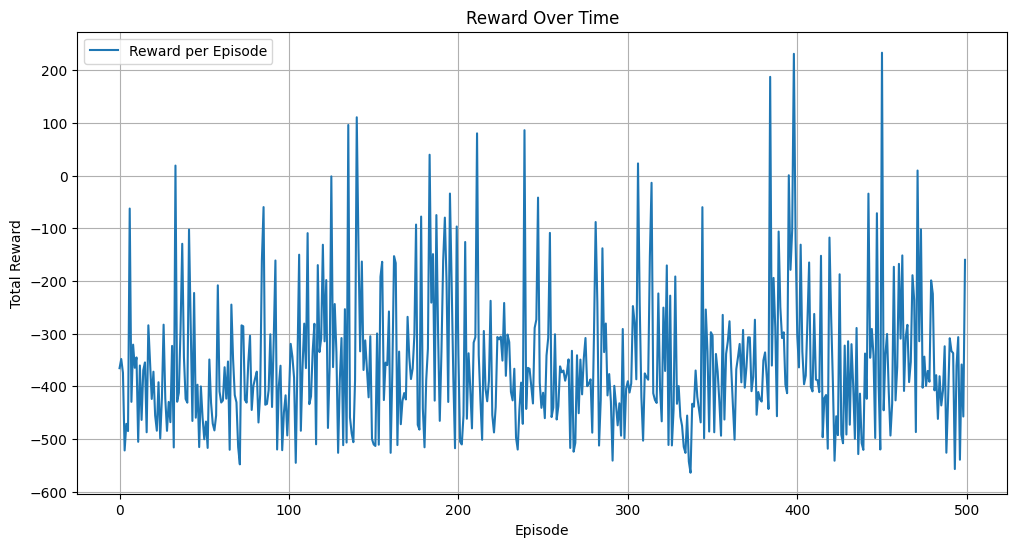

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(rewards, label='Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

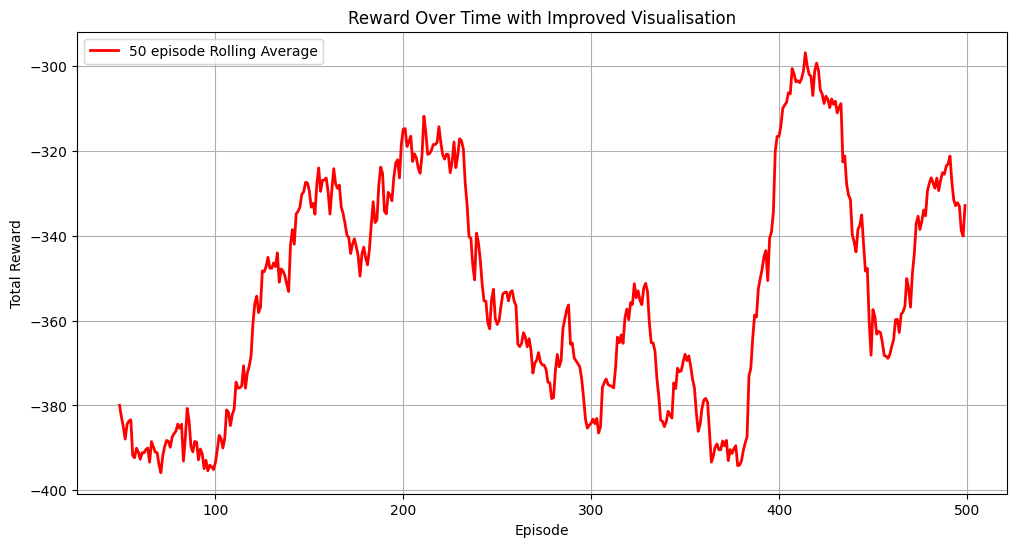

In [ ]:
#Convert the rewards list to a pandas Series for convenience
rewards_series = pd.Series(rewards)

#Calculate the rolling average with a window of the last 10 episodes
rolling_avg = rewards_series.rolling(window=50).mean()

#Create a plot with both the raw rewards and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg, label='50 episode Rolling Average', color='red', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Over Time with Improved Visualisation')
plt.legend()
plt.grid(True)
plt.show()

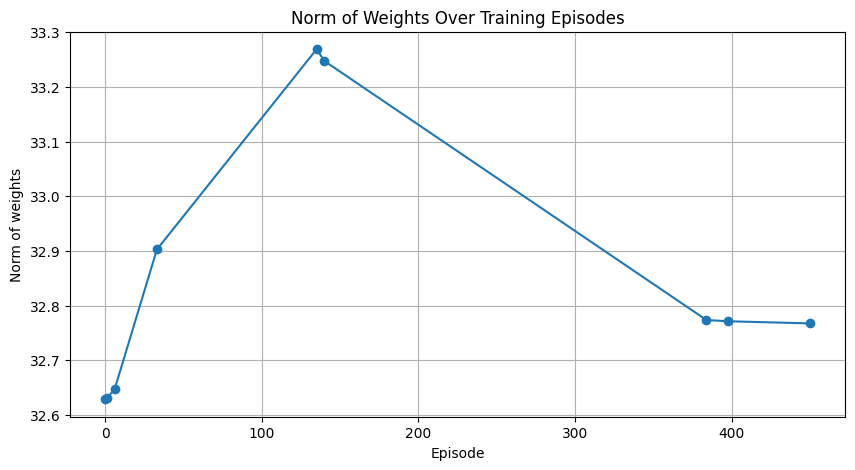

In [ ]:
episodes = list(saved_weights.keys())
weights_norm = [np.linalg.norm(np.concatenate([w.flatten() for w in weights])) for weights in saved_weights.values()]

plt.figure(figsize=(10, 5))
plt.plot(episodes, weights_norm, marker='o')
plt.xlabel('Episode')
plt.ylabel('Norm of weights')
plt.title('Norm of Weights Over Training Episodes')
plt.grid(True)
plt.show()

In [ ]:
def plot__rewards(total_rewards):
    episodes = range(1, len(total_rewards) + 1)

    moving_avg = np.convolve(total_rewards, np.ones(10)/10, mode='valid')  # 10-episode moving average
    rewards_series = pd.Series(total_rewards)

    rolling_avg = rewards_series.rolling(window=50).mean()

    plt.figure(figsize=(12, 6))

    #Total Reward per Episode
    plt.subplot(1, 2, 1)
    plt.plot(episodes, total_rewards, marker='o', linestyle='-')
    plt.title('Total Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(total_rewards, bins=20, kde=True)
    plt.title('Reward Distribution Over Episodes')
    plt.xlabel('Total Reward')
    plt.ylabel('Frequency')
    plt.show()

# Testing DQN Agent

Episode 1: Total Reward = 80.0
Episode 2: Total Reward = 20.0
Episode 3: Total Reward = 10.0
Episode 4: Total Reward = 125.0
Episode 5: Total Reward = 5.0
Episode 6: Total Reward = 310.0
Episode 7: Total Reward = 85.0
Episode 8: Total Reward = 5.0
Episode 9: Total Reward = 285.0
Episode 10: Total Reward = 140.0
Episode 11: Total Reward = 110.0
Episode 12: Total Reward = 0.0
Episode 13: Total Reward = 115.0
Episode 14: Total Reward = 85.0
Episode 15: Total Reward = 10.0
Episode 16: Total Reward = 85.0
Episode 17: Total Reward = 95.0
Episode 18: Total Reward = 60.0
Episode 19: Total Reward = 120.0
Episode 20: Total Reward = 65.0
Episode 21: Total Reward = 10.0
Episode 22: Total Reward = 365.0
Episode 23: Total Reward = 35.0
Episode 24: Total Reward = 105.0
Episode 25: Total Reward = 290.0
Episode 26: Total Reward = 245.0
Episode 27: Total Reward = 230.0
Episode 28: Total Reward = 420.0
Episode 29: Total Reward = 170.0
Episode 30: Total Reward = 140.0
Episode 31: Total Reward = 5.0
Episod

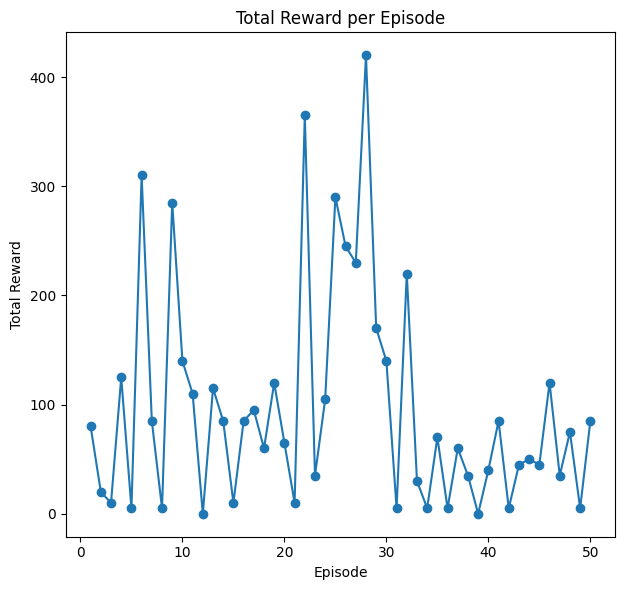

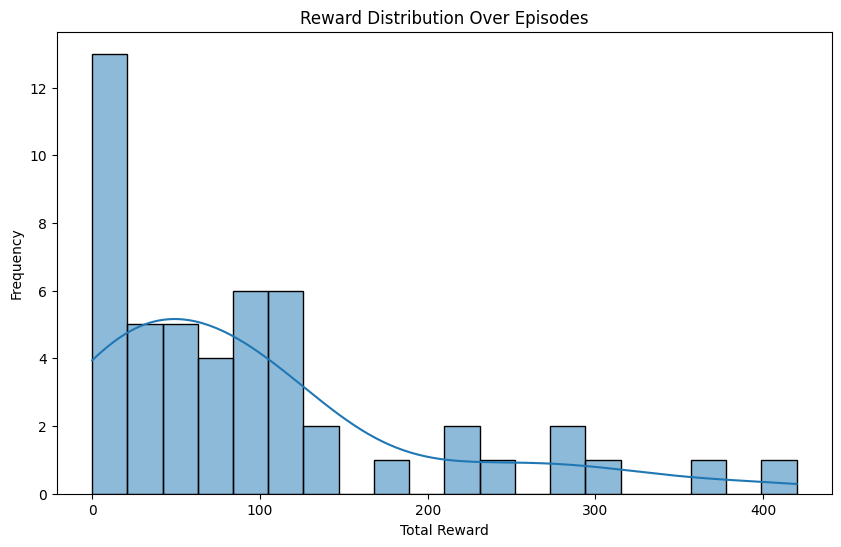

In [ ]:
def test__agent(simulation_env, model, n_episodes=50):
    tot_rewards = []
    for episode in range(n_episodes):
        #Reset the environment and retrieve the initial state
        state_tuple = simulation_env.reset()
        # Ensure state is the actual observation array, not a tuple
        state = state_tuple if not isinstance(state_tuple, tuple) else state_tuple[0]
        done = False
        tot_reward = 0
        while not done:
            # Prepare the state for model prediction
            q_values = model.predict(state[np.newaxis], verbose=0)
            # Select the optimal action based on the model's prediction
            action = np.argmax(q_values[0])
            #Execute the action
            outcomes = env.step(action)
            # Handle different lengths of returned values correctly
            state_tuple, reward, done, _ = outcomes if len(outcomes) == 4 else (outcomes[0], outcomes[1], outcomes[2], {})
            #Update state with the new state
            state = state_tuple if not isinstance(state_tuple, tuple) else state_tuple[0]
            tot_reward += reward
        tot_rewards.append(tot_reward)
        print(f"Episode {episode + 1}: Total Reward = {tot_reward}")
    print(f"Average Total Reward over {n_episodes} episodes: {np.mean(tot_rewards)}")
    plot__rewards(tot_rewards)

test__agent(simulation_env, model)

# Double DQN

In [ ]:
batch_size = 32
discount_factor = 0.99
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
#More robust approach to outliers
loss_func = keras.losses.Huber()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(8, 8), strides=(4, 4), activation="relu", input_shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(4, 4), strides=(2, 2), activation="relu"),

    #Flatten to convert 2D feature maps to 1D feature vectors
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="elu"),
    keras.layers.Dense(n_outputs)
])

#Cloning the model to create a target model
target_model = keras.models.clone_model(model)
target_model.set_weights(model.get_weights())

# Double DQN Training

In [ ]:
def DDQN_training__step(batch_size):
    experiences = sample_interaction(batch_size)
    states, actions, rewards, next_states, dones = experiences

    #Use the main model to select the best action for the next states
    next_actions = np.argmax(model.predict(next_states, verbose=0), axis=1)

    #Use the target network to calculate the Q-values for the best actions chosen by the main model
    next_q_values = target_model.predict(next_states, verbose=0)[np.arange(batch_size), next_actions]

    #Calculate target Q values
    target_q_values = rewards + (1 - dones) * discount_factor * next_q_values
    target_q_values = target_q_values.reshape(-1, 1)

    #Update main model
    with tf.GradientTape() as tape:
        all_q_values = model(states)
        q_values = tf.reduce_sum(all_q_values * tf.one_hot(actions, n_outputs), axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_q_values, q_values))
    gradient = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradient, model.trainable_variables))


In [ ]:
#Variables for tracking best performance and rewards
best_score = -np.inf
rewards = []
epsilons = []
best_weights = None
num_episodes = 500
car_max__velocity = 0

#Dictionary to store weights at regular intervals
saved_weights = {}

write_to_log("Starting training DDQN...")
for episode in range(num_episodes):
    obs = simulation_env.reset()
    episode_reward = 0

    frames = []

    for step in range(10000):
        epsilon = max(1 - episode / num_episodes, 0.01)
        #Capture current frame
        frames.append(simulation_env.render())
        obs, reward, done, info, car_max__velocity = play_one__step(simulation_env, obs, epsilon, car_max__velocity)
        episode_reward += reward
        if done:
            break

    rewards.append(episode_reward)
    epsilons.append(epsilon)


    if episode_reward > best_score:
        best_score = episode_reward
        best_weights = model.get_weights()
        archive_video(frames,
                       f'DDQN_training_videos/ep_{episode}_score_{episode_reward:3f}.mp4')
        saved_weights[episode] = model.get_weights()

    if len(experience_replay_buffer) > batch_size:
        DDQN_training__step(batch_size)

    #Frequency to update the model
    if episode % 20 == 0:
        target_model.set_weights(model.get_weights())


    episode_details = f"\rEpisode: {episode}, Reward: {episode_reward}, Best score: {best_score}, Epsilon: {epsilon:.3f}"
    write_to_log(episode_details)
    print(f"{episode_details}", end="")

if best_weights:
    model.set_weights(best_weights)

Episode: 499, Reward: -440.80000000000155, Best score: 510.00000000001273, Epsilon: 0.010

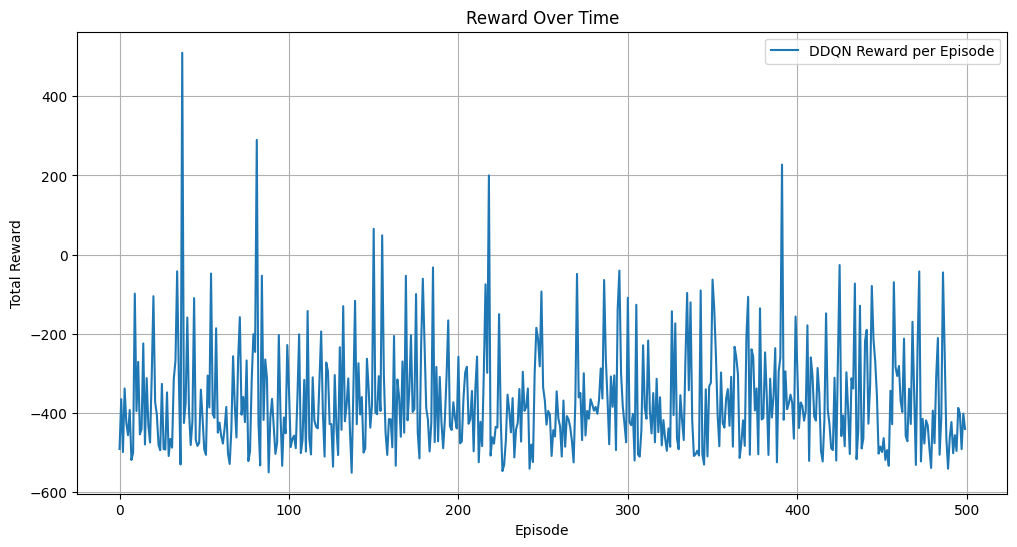

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(rewards, label='DDQN Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

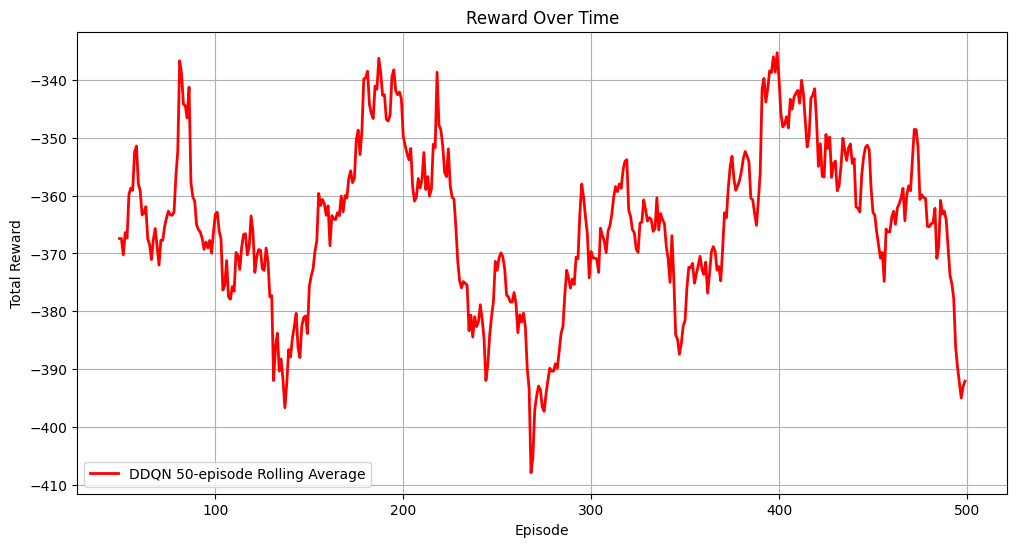

In [ ]:
#Converting rewards list to a pandas Series for convenience
rewards_series = pd.Series(rewards)
#Calculate the rolling average with a window of the last 50 episodes
rolling_average = rewards_series.rolling(window=50).mean()

#Raw rewards and the rolling average
plt.figure(figsize=(12, 6))
#plt.plot(rewards, label='Reward per Episode', alpha=0.5)  # Original rewards with some transparency
plt.plot(rolling_average, label='DDQN 50-episode Rolling Average', color='red', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Over Time')
plt.legend()
plt.grid(True)
plt.show()

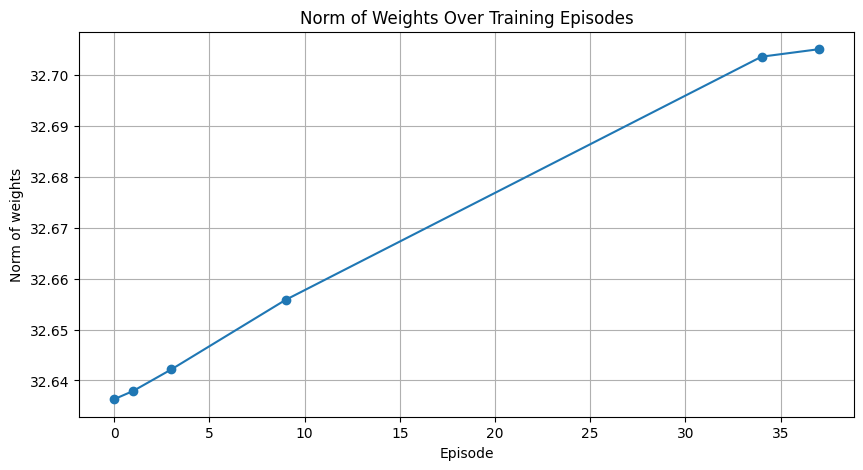

In [ ]:
episodes = list(saved_weights.keys())
weights_norm = [np.linalg.norm(np.concatenate([w.flatten() for w in weights])) for weights in saved_weights.values()]

plt.figure(figsize=(10, 5))
plt.plot(episodes, weights_norm, marker='o')
plt.xlabel('Episode')
plt.ylabel('Norm of weights')
plt.title('Norm of Weights Over Training Episodes')
plt.grid(True)
plt.show()

# Testing DDQN

Episode 1: Total Reward = 110.0
Episode 2: Total Reward = 115.0
Episode 3: Total Reward = 155.0
Episode 4: Total Reward = 65.0
Episode 5: Total Reward = 135.0
Episode 6: Total Reward = 110.0
Episode 7: Total Reward = 350.0
Episode 8: Total Reward = 175.0
Episode 9: Total Reward = 115.0
Episode 10: Total Reward = 200.0
Episode 11: Total Reward = 170.0
Episode 12: Total Reward = 120.0
Episode 13: Total Reward = 125.0
Episode 14: Total Reward = 390.0
Episode 15: Total Reward = 50.0
Episode 16: Total Reward = 110.0
Episode 17: Total Reward = 75.0
Episode 18: Total Reward = 65.0
Episode 19: Total Reward = 405.0
Episode 20: Total Reward = 135.0
Episode 21: Total Reward = 120.0
Episode 22: Total Reward = 90.0
Episode 23: Total Reward = 115.0
Episode 24: Total Reward = 150.0
Episode 25: Total Reward = 170.0
Episode 26: Total Reward = 150.0
Episode 27: Total Reward = 115.0
Episode 28: Total Reward = 145.0
Episode 29: Total Reward = 345.0
Episode 30: Total Reward = 115.0
Episode 31: Total Reward

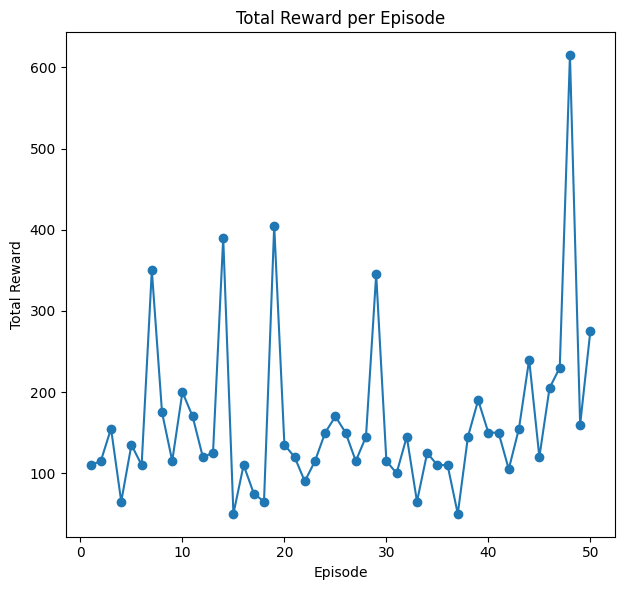

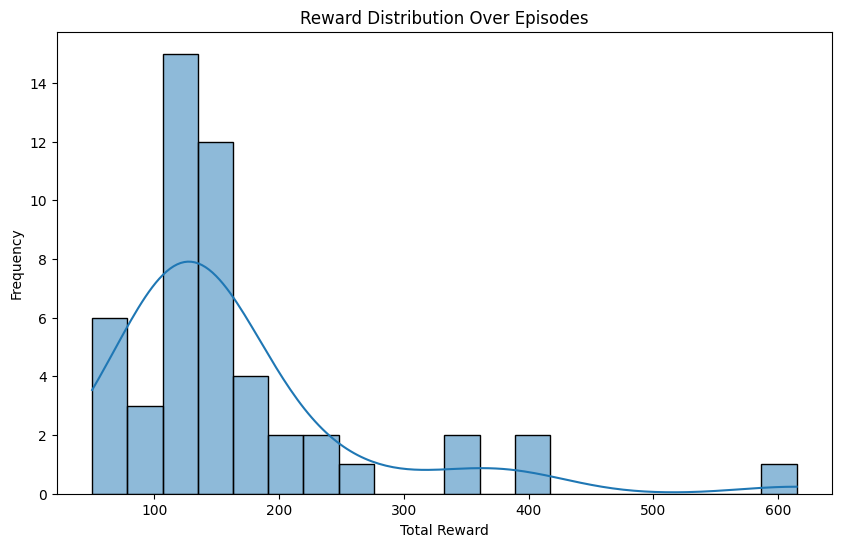

In [ ]:
def test__agent(simulation_env, model, n_episodes=50):
    total_rewards = []
    for episode in range(n_episodes):
        #Reset the environment and get the initial state
        state_tuple = simulation_env.reset()

        state = state_tuple if not isinstance(state_tuple, tuple) else state_tuple[0]
        done = False
        total_reward = 0
        while not done:
            #Preparing state for model prediction
            q_values = model.predict(state[np.newaxis], verbose=0)
            #Choosing best action based on the model prediction
            action = np.argmax(q_values[0])
            #Perform action
            outcomes = simulation_env.step(action)
            #Handle different lengths of returned values
            state_tuple, reward, done, _ = outcomes if len(outcomes) == 4 else (outcomes[0], outcomes[1], outcomes[2], {})
            #Update state with new state
            state = state_tuple if not isinstance(state_tuple, tuple) else state_tuple[0]
            total_reward += reward

        total_rewards.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    print(f"Average Total Reward over {n_episodes} episodes: {np.mean(total_rewards)}")
    plot__rewards(total_rewards)

test__agent(simulation_env, model)